In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('logs/mistral-first-exp-3shot-100.csv')
import ast

# Convert string representations of dictionaries into actual dictionaries
df['unique_answers'] = df['unique_answers'].apply(ast.literal_eval)
df['logp_ai_given_q'] = df['logp_ai_given_q'].apply(ast.literal_eval)


In [8]:
df.head(3)

,question_number,unique_answers,logp_ai_given_q
0,0,{72: 100},{72: 2.1435902024080633e-05}
1,1,"{10: 61, 8: 2, 500: 1, 83: 1, 12: 2, 11: 4, 12...","{10: 3.830514806337253, 8: 12.438743230315158,..."
2,2,"{100: 3, 30: 26, 5: 25, 70: 1, 15: 21, 55: 6, ...","{100: 13.76013252424586, 30: 15.99001522533526..."


In [9]:
df['unique_answers'][0]

{72: 100}

PROBLEM  0


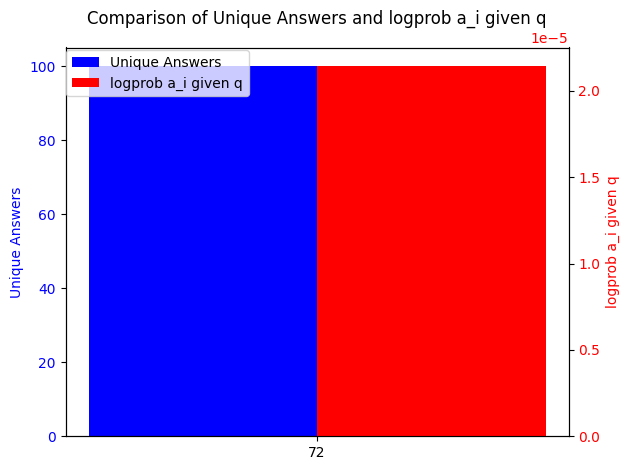

PROBLEM  1


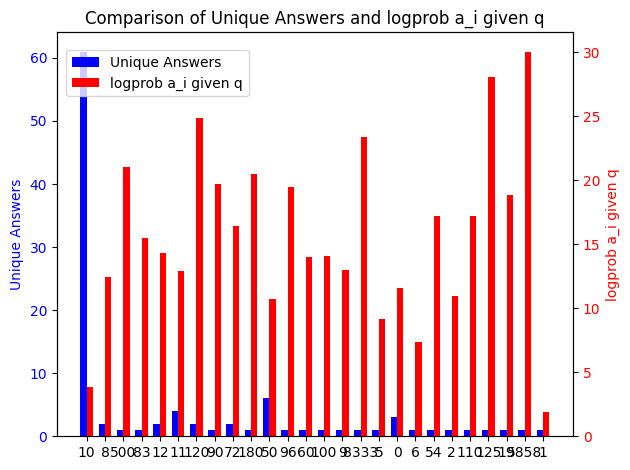

PROBLEM  2


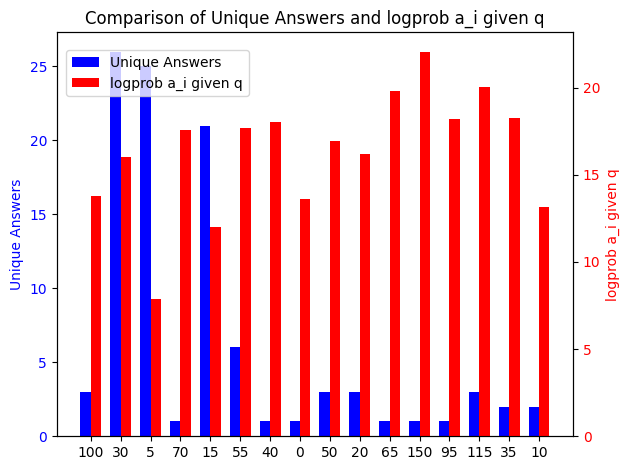

PROBLEM  3


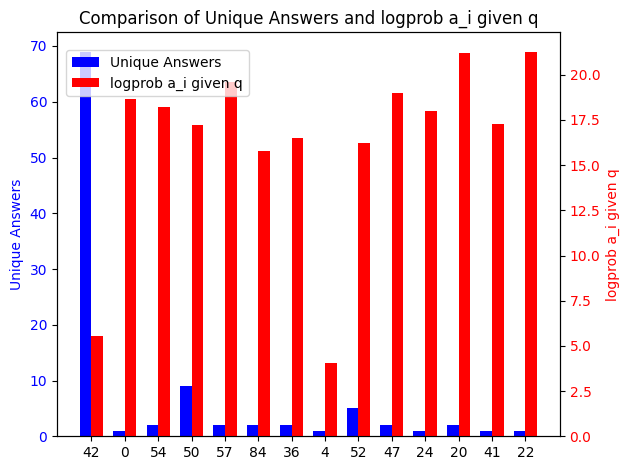

PROBLEM  4


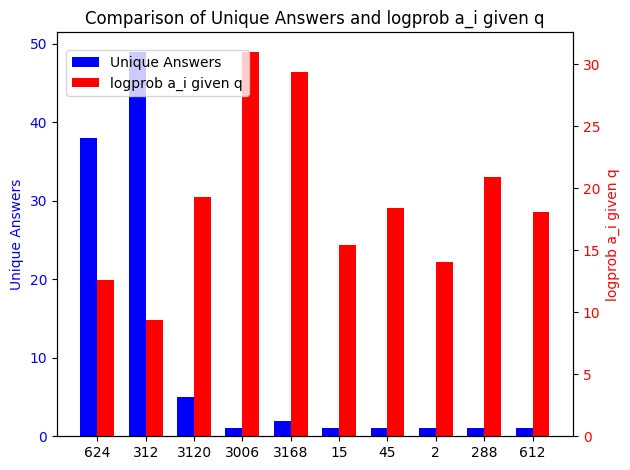

In [15]:
for idx, row in df.iterrows():
    print("PROBLEM ", idx)
    unique_answers = row['unique_answers']
    logp_ai_given_q = row['logp_ai_given_q']
    keys = unique_answers.keys()
    unique_vals = [unique_answers[k] for k in keys]
    logp_vals = [logp_ai_given_q[k] for k in keys]

    x = range(len(keys))
    width = 0.35

    fig, ax1 = plt.subplots()

    rects1 = ax1.bar(x, unique_vals, width, label='Unique Answers', color='b')
    ax1.set_ylabel('Unique Answers', color='b')
    ax1.set_title('Comparison of Unique Answers and logprob a_i given q')
    ax1.set_xticks([p + width / 2 for p in x])
    ax1.set_xticklabels(keys)
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    rects2 = ax2.bar([p + width for p in x], logp_vals, width, label='logprob a_i given q', color='r')
    ax2.set_ylabel('logprob a_i given q', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
    plt.show()
